In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
    allow_growth=True
    ))
data = pd.DataFrame()

In [2]:
# Recovery action の入ったデータ

r_path = '../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/'
contents = os.listdir(r_path)
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])


../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061453.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061458.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061510.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061520.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061526.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061727.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808071200.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808071317.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808071320.csv


In [3]:
# ブレることなくボールをゴールに運んだデータ
r_path = '../data/LOG_G/fix_ball_robot/bk_stable/'
contents = os.listdir(r_path)
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])
d = data

../data/LOG_G/fix_ball_robot/bk_stable/log201808031429.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031431.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031442.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031448.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031503.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031508.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031618.csv


In [4]:
# ブレることなくボールをゴールに運んだデータをまとめたもの
'''
target_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'
data = pd.read_csv(target_path,header=None)

print(data)
d = data
#print(ball)
#print(joy)
'''

"\ntarget_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'\ndata = pd.read_csv(target_path,header=None)\n\nprint(data)\nd = data\n#print(ball)\n#print(joy)\n"

In [5]:
d.columns = ['l_bx','l_by','l_pole0x','l_pole0y','l_pole1x','l_pole1y','g_bx','g_by','g_pole0x','g_pole0y','g_pole1x','g_pole1y','g_px','g_py','g_pth','ljx','ljy','rjx','rjy']
#d = d[d.bx!=-1]

In [6]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [7]:
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18

cl_goal = (l_pole0+l_pole1)/2
print(cl_goal)

[[4.80301535e+00 1.90990107e-03]
 [4.80301535e+00 1.90990107e-03]
 [4.80301535e+00 1.90990107e-03]
 ...
 [6.82373746e-01 3.80468028e-01]
 [6.80956847e-01 3.80922656e-01]
 [6.80956847e-01 3.80922656e-01]]


In [8]:
from sklearn.cross_validation import train_test_split

IN_size = 4
TAR_size = 3
'''
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18

l_ball = np.array(d.iloc[:,0:2])   #  0, 1
lc_goal = np.array(d.iloc[:,2:4])  #  2, 3
g_ball = np.array(d.iloc[:,4:6])   #  4, 5
g_pole0 = np.array(d.iloc[:,6:8]) #  6, 7
g_pole1 = np.array(d.iloc[:,8:10])# 8,9
g_pos = np.array(d.iloc[:,10:13])  # 10,11,12
ljoy = np.array(d.iloc[:,13:15])   # 13,14
rjoy = np.array(d.iloc[:,15:17])   # 15,16
'''
input_d = np.c_[l_ball, cl_goal]
print(input_d)
output_d = np.array(d.iloc[:,13:16])
print(input_d.shape)
print(output_d.shape)



IN_train, IN_test, TAR_train, TAR_test = train_test_split(input_d,output_d,test_size=0.1,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#IN_train = IN_train/100.0
#IN_test = IN_test/100.0
for t in range(10):
    print(IN_train[t])
'''
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
'''

[[ 1.50840186e+00 -1.11412697e+00  4.80301535e+00  1.90990107e-03]
 [ 1.50840186e+00 -1.11412697e+00  4.80301535e+00  1.90990107e-03]
 [ 1.50840186e+00 -1.11412697e+00  4.80301535e+00  1.90990107e-03]
 ...
 [-4.00736687e+00  1.40364661e+00  6.82373746e-01  3.80468028e-01]
 [-4.01049517e+00  1.39623626e+00  6.80956847e-01  3.80922656e-01]
 [-4.01049517e+00  1.39623626e+00  6.80956847e-01  3.80922656e-01]]
(59018, 4)
(59018, 3)
[ 1.86033021 -0.78384176  4.5928178   0.87229635]
[0.33887833 0.016445   2.66198792 0.28286135]
[ 0.33117676 -0.33743405  2.70300306 -1.76385059]
[0.4028622  0.06755134 2.73054983 2.65223488]
[ 0.25909871 -0.11927872  3.56778294  0.73664687]
[0.60733864 0.1926348  2.18344999 2.97199178]
[1.84709785 0.1839482  3.37755343 2.98873542]
[ 0.30064744 -0.10221874  2.25464796  0.17834859]
[ 0.37261876 -0.08704849  3.83410629 -0.43067706]
[ 0.2151423  -0.09417328  0.67939129  0.18153039]


C:\Users\cihsato\Anaconda3\envs\tensorflow16\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\n'

In [9]:
#　初期化
sess = tf.Session(config=config)
test_sess = tf.Session(config=config)

INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [10]:
#hidden_size = [100]
hidden_size = [30,8]
batch_size = 100
iter_size = 200000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize])))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize])))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size])))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size])))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 30), dtype=float32)
Tensor("Relu_1:0", shape=(?, 8), dtype=float32)
Tensor("Add_2:0", shape=(?, 3), dtype=float32)


In [11]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
test_loss = tf.losses.mean_squared_error(TARGET,final_output)
opt = tf.train.AdamOptimizer(0.001)
#opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
loss_vec=[]
test_loss_vec=[]
for i in range(iter_size):
    train_rand_index = np.random.choice(len(IN_train), size=batch_size,replace=False)
    train_rand_in = IN_train[train_rand_index]
    train_rand_tar = TAR_train[train_rand_index]
    sess.run(train_step, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar}))
    
    test_rand_index = np.random.choice(len(IN_test), size=batch_size,replace=False)
    test_rand_in = IN_test[test_rand_index]
    test_rand_tar = TAR_test[test_rand_index]
    test_sess.run(train_step, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar})
    test_loss_vec.append(test_sess.run(test_loss, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar}))
    
    if (i+1)%100==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:100, Loss = 37.014145
Generation:200, Loss = 9.306436
Generation:300, Loss = 3.949576
Generation:400, Loss = 1.9138961
Generation:500, Loss = 1.5673851
Generation:600, Loss = 1.1577148
Generation:700, Loss = 1.0341343
Generation:800, Loss = 0.93143654
Generation:900, Loss = 0.82446
Generation:1000, Loss = 0.76215327
Generation:1100, Loss = 0.7939175
Generation:1200, Loss = 0.64683306
Generation:1300, Loss = 0.58967036
Generation:1400, Loss = 0.5598084
Generation:1500, Loss = 0.5316617
Generation:1600, Loss = 0.47056133
Generation:1700, Loss = 0.45142573
Generation:1800, Loss = 0.4185812
Generation:1900, Loss = 0.40721557
Generation:2000, Loss = 0.38680723
Generation:2100, Loss = 0.3620846
Generation:2200, Loss = 0.3160451
Generation:2300, Loss = 0.3307352
Generation:2400, Loss = 0.32734182
Generation:2500, Loss = 0.2534498
Generation:2600, Loss = 0.257076
Generation:2700, Loss = 0.26256144
Generation:2800, Loss = 0.23590218
Generation:2900, Loss = 0.21025087
Generation:3000,

Generation:23100, Loss = 0.030516252
Generation:23200, Loss = 0.034352247
Generation:23300, Loss = 0.028416412
Generation:23400, Loss = 0.029217288
Generation:23500, Loss = 0.034162063
Generation:23600, Loss = 0.034125373
Generation:23700, Loss = 0.033852167
Generation:23800, Loss = 0.035132706
Generation:23900, Loss = 0.037189245
Generation:24000, Loss = 0.030428963
Generation:24100, Loss = 0.030200224
Generation:24200, Loss = 0.032219682
Generation:24300, Loss = 0.035273593
Generation:24400, Loss = 0.03516711
Generation:24500, Loss = 0.033850163
Generation:24600, Loss = 0.028219255
Generation:24700, Loss = 0.03848882
Generation:24800, Loss = 0.03875042
Generation:24900, Loss = 0.028900633
Generation:25000, Loss = 0.03640126
Generation:25100, Loss = 0.032506943
Generation:25200, Loss = 0.031828232
Generation:25300, Loss = 0.038160186
Generation:25400, Loss = 0.028380172
Generation:25500, Loss = 0.03475862
Generation:25600, Loss = 0.041164342
Generation:25700, Loss = 0.031305972
Genera

Generation:45500, Loss = 0.035397746
Generation:45600, Loss = 0.031330388
Generation:45700, Loss = 0.025701573
Generation:45800, Loss = 0.03301752
Generation:45900, Loss = 0.030589325
Generation:46000, Loss = 0.025210356
Generation:46100, Loss = 0.026636245
Generation:46200, Loss = 0.034767076
Generation:46300, Loss = 0.03786942
Generation:46400, Loss = 0.02858427
Generation:46500, Loss = 0.044539157
Generation:46600, Loss = 0.03627877
Generation:46700, Loss = 0.031572722
Generation:46800, Loss = 0.03647662
Generation:46900, Loss = 0.028731817
Generation:47000, Loss = 0.039135717
Generation:47100, Loss = 0.03120765
Generation:47200, Loss = 0.047511898
Generation:47300, Loss = 0.038353726
Generation:47400, Loss = 0.028651409
Generation:47500, Loss = 0.04919272
Generation:47600, Loss = 0.02944285
Generation:47700, Loss = 0.022504091
Generation:47800, Loss = 0.027757302
Generation:47900, Loss = 0.027900754
Generation:48000, Loss = 0.030557552
Generation:48100, Loss = 0.0207512
Generation:

Generation:67900, Loss = 0.038255826
Generation:68000, Loss = 0.034814805
Generation:68100, Loss = 0.042479236
Generation:68200, Loss = 0.032381594
Generation:68300, Loss = 0.02387677
Generation:68400, Loss = 0.023608955
Generation:68500, Loss = 0.041129783
Generation:68600, Loss = 0.036364228
Generation:68700, Loss = 0.040779773
Generation:68800, Loss = 0.02897367
Generation:68900, Loss = 0.030185021
Generation:69000, Loss = 0.03105746
Generation:69100, Loss = 0.035000768
Generation:69200, Loss = 0.036627952
Generation:69300, Loss = 0.03531606
Generation:69400, Loss = 0.027190583
Generation:69500, Loss = 0.030877942
Generation:69600, Loss = 0.023502966
Generation:69700, Loss = 0.029987669
Generation:69800, Loss = 0.03414088
Generation:69900, Loss = 0.031470343
Generation:70000, Loss = 0.03516649
Generation:70100, Loss = 0.037844807
Generation:70200, Loss = 0.021819128
Generation:70300, Loss = 0.030159533
Generation:70400, Loss = 0.030651402
Generation:70500, Loss = 0.034944784
Generat

Generation:90300, Loss = 0.037102118
Generation:90400, Loss = 0.020755854
Generation:90500, Loss = 0.02798276
Generation:90600, Loss = 0.029503603
Generation:90700, Loss = 0.030570066
Generation:90800, Loss = 0.03515966
Generation:90900, Loss = 0.034817517
Generation:91000, Loss = 0.032553278
Generation:91100, Loss = 0.02901913
Generation:91200, Loss = 0.029586181
Generation:91300, Loss = 0.042245638
Generation:91400, Loss = 0.0294677
Generation:91500, Loss = 0.035670128
Generation:91600, Loss = 0.024132587
Generation:91700, Loss = 0.031009305
Generation:91800, Loss = 0.047117144
Generation:91900, Loss = 0.033065397
Generation:92000, Loss = 0.029498981
Generation:92100, Loss = 0.034346458
Generation:92200, Loss = 0.028539432
Generation:92300, Loss = 0.018927364
Generation:92400, Loss = 0.038807478
Generation:92500, Loss = 0.030925486
Generation:92600, Loss = 0.024699919
Generation:92700, Loss = 0.032047372
Generation:92800, Loss = 0.03203359
Generation:92900, Loss = 0.032059073
Generat

Generation:112400, Loss = 0.024576163
Generation:112500, Loss = 0.03186439
Generation:112600, Loss = 0.022960806
Generation:112700, Loss = 0.028051907
Generation:112800, Loss = 0.032678287
Generation:112900, Loss = 0.031009791
Generation:113000, Loss = 0.04004111
Generation:113100, Loss = 0.022998517
Generation:113200, Loss = 0.031718276
Generation:113300, Loss = 0.033796683
Generation:113400, Loss = 0.034272727
Generation:113500, Loss = 0.022191687
Generation:113600, Loss = 0.03218875
Generation:113700, Loss = 0.031767342
Generation:113800, Loss = 0.04293909
Generation:113900, Loss = 0.04001176
Generation:114000, Loss = 0.032450363
Generation:114100, Loss = 0.027753308
Generation:114200, Loss = 0.024414662
Generation:114300, Loss = 0.03214083
Generation:114400, Loss = 0.028399589
Generation:114500, Loss = 0.037108902
Generation:114600, Loss = 0.023704398
Generation:114700, Loss = 0.025679117
Generation:114800, Loss = 0.025140766
Generation:114900, Loss = 0.03393359
Generation:115000, 

Generation:134200, Loss = 0.03463478
Generation:134300, Loss = 0.029031254
Generation:134400, Loss = 0.026041487
Generation:134500, Loss = 0.028410988
Generation:134600, Loss = 0.034713868
Generation:134700, Loss = 0.030383475
Generation:134800, Loss = 0.02888276
Generation:134900, Loss = 0.03721362
Generation:135000, Loss = 0.037017774
Generation:135100, Loss = 0.033447098
Generation:135200, Loss = 0.03556604
Generation:135300, Loss = 0.037083663
Generation:135400, Loss = 0.022512304
Generation:135500, Loss = 0.030296668
Generation:135600, Loss = 0.030156482
Generation:135700, Loss = 0.029386377
Generation:135800, Loss = 0.028867446
Generation:135900, Loss = 0.023779918
Generation:136000, Loss = 0.024342598
Generation:136100, Loss = 0.029971914
Generation:136200, Loss = 0.040677942
Generation:136300, Loss = 0.031477112
Generation:136400, Loss = 0.035083953
Generation:136500, Loss = 0.03372845
Generation:136600, Loss = 0.028500836
Generation:136700, Loss = 0.038481794
Generation:136800

Generation:156000, Loss = 0.030931361
Generation:156100, Loss = 0.035534177
Generation:156200, Loss = 0.03260642
Generation:156300, Loss = 0.026913747
Generation:156400, Loss = 0.040766213
Generation:156500, Loss = 0.030453093
Generation:156600, Loss = 0.030086072
Generation:156700, Loss = 0.029396003
Generation:156800, Loss = 0.03551152
Generation:156900, Loss = 0.03251437
Generation:157000, Loss = 0.032406677
Generation:157100, Loss = 0.031012958
Generation:157200, Loss = 0.031759188
Generation:157300, Loss = 0.037514232
Generation:157400, Loss = 0.043416336
Generation:157500, Loss = 0.027936427
Generation:157600, Loss = 0.033129524
Generation:157700, Loss = 0.032456044
Generation:157800, Loss = 0.028468437
Generation:157900, Loss = 0.028073289
Generation:158000, Loss = 0.030625906
Generation:158100, Loss = 0.032769073
Generation:158200, Loss = 0.03134978
Generation:158300, Loss = 0.034291826
Generation:158400, Loss = 0.029758863
Generation:158500, Loss = 0.025896715
Generation:15860

Generation:177800, Loss = 0.032456756
Generation:177900, Loss = 0.030269051
Generation:178000, Loss = 0.040197622
Generation:178100, Loss = 0.026433304
Generation:178200, Loss = 0.02771293
Generation:178300, Loss = 0.034576505
Generation:178400, Loss = 0.03855102
Generation:178500, Loss = 0.026324257
Generation:178600, Loss = 0.026877575
Generation:178700, Loss = 0.033922214
Generation:178800, Loss = 0.028533032
Generation:178900, Loss = 0.036161825
Generation:179000, Loss = 0.040860947
Generation:179100, Loss = 0.03258261
Generation:179200, Loss = 0.029033832
Generation:179300, Loss = 0.030578403
Generation:179400, Loss = 0.037388638
Generation:179500, Loss = 0.029623792
Generation:179600, Loss = 0.029153049
Generation:179700, Loss = 0.022358611
Generation:179800, Loss = 0.03257488
Generation:179900, Loss = 0.028803816
Generation:180000, Loss = 0.029220082
Generation:180100, Loss = 0.03692961
Generation:180200, Loss = 0.029151713
Generation:180300, Loss = 0.027339684
Generation:180400

Generation:199600, Loss = 0.023566028
Generation:199700, Loss = 0.036852147
Generation:199800, Loss = 0.029331865
Generation:199900, Loss = 0.028935712
Generation:200000, Loss = 0.026358804


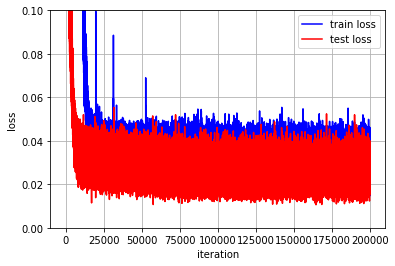

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.plot(loss_vec,c='b',linestyle='solid',label='train loss')
plt.plot(test_loss_vec,c='r',label='test loss')

#plt.xlim(60000,60100)
plt.ylim(0,0.1)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')
plt.legend()


#print(test_loss_vec[99999])
#print(test_loss_vec[99999])

In [13]:
# 重みの保存
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')


'./model.ckpt'

In [14]:
'''
# ボール座標とスティックの傾きプロット
by_max=IN_train.max(axis=0)[1]
by_min=IN_train.min(axis=0)[1]

ball_y = np.array(range(int(by_min)-3,int(by_max)+3))
for i in range(len(ball_y)):
    
    ball = np.array([[6.0, ball_y[i]/10.0]])
    
    print(ball)
    joy = sess.run(final_output, feed_dict={INPUT: ball})
    plt.scatter(ball[0][1],ball[0][0], s=200, c='orange')
    
    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)
    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)
    print(joy)
    plt.savefig(str(hidden_size)+'_img'+'.png')
    '''

'\n# ボール座標とスティックの傾きプロット\nby_max=IN_train.max(axis=0)[1]\nby_min=IN_train.min(axis=0)[1]\n\nball_y = np.array(range(int(by_min)-3,int(by_max)+3))\nfor i in range(len(ball_y)):\n    \n    ball = np.array([[6.0, ball_y[i]/10.0]])\n    \n    print(ball)\n    joy = sess.run(final_output, feed_dict={INPUT: ball})\n    plt.scatter(ball[0][1],ball[0][0], s=200, c=\'orange\')\n    \n    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)\n    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)\n    print(joy)\n    plt.savefig(str(hidden_size)+\'_img\'+\'.png\')\n    '

In [15]:
# 重みのrestore
predicts_sess = tf.Session(config=config)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(predicts_sess, './model.ckpt')

INFO:tensorflow:Restoring parameters from ./model.ckpt
